In [6]:
Malware Dataset: https://github.com/emr4h/Malware-Detection-Using-Machine-Learning/tree/main/data-set 

Address Point Of Entry: Refers to a specific address in memory where the execution of a malicious program starts. Most malicious files use same entry points, so this could help in identifying malware vs legit files as legit files have different entry points as a whole.
 
Major Linker Version: Refers to specific version of a linker that compiles the source code of an execuatble and links them to a library so that they can be executed. Malicious files may use specific linkers or (techniques of linking to libraries or other executables).
 
Major Image Version: Refers to the compiled binary file of the malware as malware may have specific compiled patterns compared to legit files.
 
Major Operating System Version: Refers to the OS version that is required to run the malware. Some OS may be targeted more than others, especially when downloading malware.
 
DLL Characteristics: Refers to Dynamic Link Libraries used when executing a file (malware). Could show how executable interacts in a malicious or legit way (if they interact with security features and try to access permissions).
 
Size of Stack Reserve: Refers to how many stack frames are reserved for executable file. Malicious files could try to reserve very large stack frames for different attack staregies.
 
Number Of Sections.data: Refers to sections of different parts program has when linker compiles files into final version of executable. Malicious files may have large data amounts in various sections. These sections may be encoded, obfruscated, etc... to make them harder to detect. Larger sections may indicate more malicious behavior.
 
Resource Size: Refers to resouces used by executable (strings, images, icons, calls to outside sources). Malicious files may use similar icons, images, calls, etc... which could be used to compare to legit resource sizes that do not have these things in them.
 
Legitimate Data: Either 0 legit, or 1 malicious (labels associated with distinguishing in our dataset).
has context menu

SyntaxError: invalid syntax (2484579770.py, line 1)

In [9]:
import pandas as pd

malData = pd.read_csv("MalwareData.csv", sep="|") #reads the MalwareData.csv file 

legit = malData[0:41323].drop(["legitimate"], axis=1, errors='ignore') #slices the malData to include the first 41,323 rows
mal = malData[41323::].drop(["legitimate"], axis=1, errors='ignore') #slices the malData to include from 41,323 till the end

print("The shape of the of the legit dataset is: %s sample, %s features"%(legit.shape[0],legit.shape[1])) #prints the shape of the legit dataset
print("The shape of the of the malware dataset is: %s sample, %s features"%(mal.shape[0],mal.shape[1])) #prints the shape of the malware dataset

The shape of the of the legit dataset is: 41323 sample, 1 features
The shape of the of the malware dataset is: 96121 sample, 1 features


In [10]:
print(malData.columns) #prints the names of the columns in the dataset


Index(['AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate'], dtype='object')


In [11]:
print(malData.head(30)) #prints the first 30 columns/rows


   AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0                    10407,9,6,6,33088,262144,4,952,1                                                                                                                 
1                     5354,9,6,6,33088,262144,4,952,1                                                                                                                 
2                 58807,9,6,6,33088,262144,4,136490,1                                                                                                                 
3                   25166,9,6,6,33088,262144,4,1940,1                                                                                                                 
4                  70387,9,6,6,33088,262144,4,83098,1                                                                                                                

In [12]:
pd.set_option("display.max_columns", None) #tells how many columns to display when you print the dataset


In [13]:
print(legit.take([1])) #prints the name of columns and the values in the rows for each section


  AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
1                    5354,9,6,6,33088,262144,4,952,1                                                                                                                 


In [14]:
print(mal.take([1]))




      AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
41324                61532,10,0,5,33088,1048576,5,9640,0                                                                                                                 


In [15]:
print(malData.head(5)) #prints first five rows/columns with values and names

  AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0                   10407,9,6,6,33088,262144,4,952,1                                                                                                                 
1                    5354,9,6,6,33088,262144,4,952,1                                                                                                                 
2                58807,9,6,6,33088,262144,4,136490,1                                                                                                                 
3                  25166,9,6,6,33088,262144,4,1940,1                                                                                                                 
4                 70387,9,6,6,33088,262144,4,83098,1                                                                                                                 


In [7]:
pd.set_option("display.max_columns", None)

In [ ]:
# RF (Random Forest Algorithm) Takes the output from multiple decision trees to provide a result

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [9]:
import pandas as pd

# Load the dataset again or redefine malData
malData = pd.read_csv('MalwareData.csv')  
# creates a new array called data_in using the three columns 
data_in = malData.drop(['AddressOfEntryPoint', 'ResourceSize', 'legitimate'], axis=1, errors='ignore').values 
labels = malData['legitimate'].values #creates an array called labels that holds the values from the legitamate section
extratrees = ExtraTreesClassifier() #initalizes a extratrees object. Used for classification tasks
extratrees.fit(data_in, labels) #trains the ExtraTreesClassifier using the data_in features and the labels
select = SelectFromModel(extratrees,prefit=True) #intializes a selectfromModel object based on importance scores from extratrees
data_in_new = select.transform(data_in) #transforms original data_in array to only select important features chose by extratrees. Result stored in data_in_new array
print(data_in.shape,data_in_new.shape) #prints the number of shapes and features/rows/columns

(137444, 6) (137444, 2)


In [10]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np #library used for working with arrays

# Load the dataset
df = pd.read_csv('MalwareData.csv')

# Display the first few rows and column names to understand the data
print("Dataset Columns:", df.columns)
print("First few rows of the dataset:")
print(df.head())

# Prepare the data
X = df.drop(['legitimate'], axis=1, errors='ignore')
y = df['legitimate']

# Convert categorical features to numerical if necessary
X = pd.get_dummies(X)  # This converts categorical columns to dummy/indicator variables

# Initialize and fit the model
extratrees = ExtraTreesClassifier() # extremely randomized tree classifier
extratrees.fit(X, y)

# Perform feature selection with a low threshold to include all features
select = SelectFromModel(extratrees, threshold=-np.inf, prefit=True) # -nf = negative infinity
X_new = select.transform(X)

# Use DataFrame for the transformed data to retain feature names, makes rows and columns
X_new = pd.DataFrame(X_new, columns=X.columns[select.get_support()]) #creates new dataframe (tabular data structure) for the important features

# Print the shape of the original and transformed data
print("Shape of X:", X.shape)
print("Shape of X_new:", X_new.shape)

# Access feature importances
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(len(importances)):
    print(f"{X.columns[i]}: {importances[i]:.4f}")




Dataset Columns: Index(['AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion',
       'MajorOperatingSystemVersion', 'DllCharacteristics',
       'SizeOfStackReserve', 'NumberOfSections', 'ResourceSize', 'legitimate'],
      dtype='object')
First few rows of the dataset:
   AddressOfEntryPoint  MajorLinkerVersion  MajorImageVersion  \
0                10407                   9                  6   
1                 5354                   9                  6   
2                58807                   9                  6   
3                25166                   9                  6   
4                70387                   9                  6   

   MajorOperatingSystemVersion  DllCharacteristics  SizeOfStackReserve  \
0                            6               33088              262144   
1                            6               33088              262144   
2                            6               33088              262144   
3                            6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into training and test sets
data_train, data_test, labels_train, labels_test = train_test_split(data_in_new, labels, test_size=0.2)

# Initialize the RandomForestClassifier
classif = RandomForestClassifier(n_estimators = 500)

# Fit the classifier with the training data
classif.fit(data_train, labels_train)

print("The score of the algorithm: ", classif.score(data_test,labels_test)*100) #prints the accuracy of the RandomForest Algorithm

The score of the algorithm:  96.15846338535414


In [14]:
from sklearn.metrics import confusion_matrix

result = classif.predict(data_test) #makes predictions based on the test data
conf_mat = confusion_matrix(labels_test,result) #compares labels_test with the predicted lables(result)

# table that compares predicted values to actual values to evaluate the performance of a classification algorithm

In [15]:
false_negatives 

NameError: name 'false_negatives' is not defined

In [ ]:
# data_test is the legit (non malicious files)
# labels_result is the malicious files

In [16]:
from sklearn.metrics import confusion_matrix

result = classif.predict(data_test)
conf_mat = confusion_matrix(labels_test,result)

In [17]:
conf_mat.shape #binary classification problem

(2, 2)

In [24]:
type(conf_mat) #will be an instance of the array

numpy.ndarray

In [18]:
conf_mat

array([[19121,   133],
       [  923,  7312]])

In [ ]:
''' array ( [a], [b]
            [c], [d] )      =====> [a] = true positives
                            =====> [b] = false positives  
                            =====> [c] = false negatives
                            =====> [d] = true negatives
'''


In [19]:
print("False positives: ",conf_mat[0][1]/sum(conf_mat[0])*100)
print("False negatives: ",conf_mat[1][0]/sum(conf_mat[1])*100)

False positives:  0.6907655552093072
False negatives:  11.208257437765635


In [21]:
from sklearn.ensemble import GradientBoostingClassifier # builds multiple decision trees, where each tree corrects other trees, aka GradientBoosting

grad_boost = GradientBoostingClassifier(n_estimators=50) # will consists of 50 decision trees
grad_boost.fit(data_train,labels_train) #training the model to make predictions


GradientBoostingClassifier(n_estimators=50)

In [ ]:
# n_estimators are the number of trees in RandomForest

In [22]:
print("The score of the GradientBoostingClassifier is: ",grad_boost.score(data_test,labels_test)*100)

The score of the GradientBoostingClassifier is:  95.86743788424461


In [ ]:
# KNN (K-Nearest-Neighbors Algorithm) tries to predict the correct class for the test data by calculating the distance between the test data and all the training points

In [23]:
data = pd.read_csv('MalwareData.csv') #reads the MalwareData set


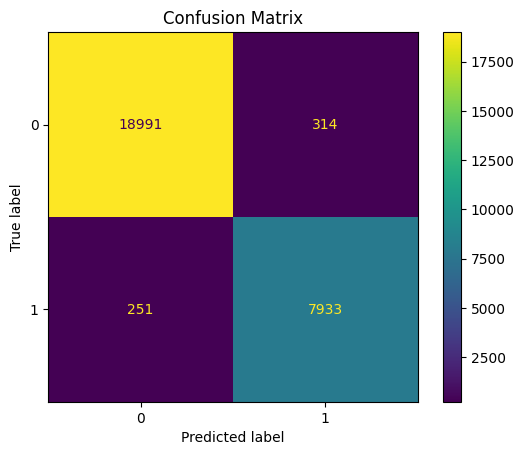

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19305
           1       0.96      0.97      0.97      8184

    accuracy                           0.98     27489
   macro avg       0.97      0.98      0.98     27489
weighted avg       0.98      0.98      0.98     27489



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


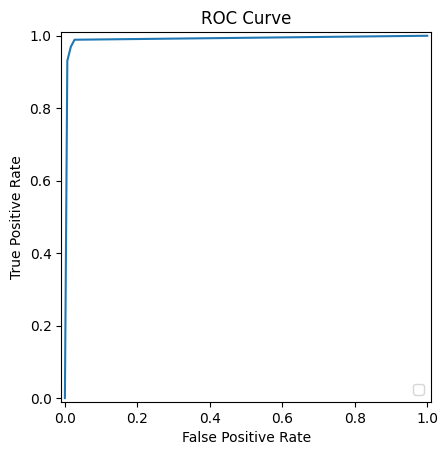

Cross-validated scores: [0.9826476  0.9811561  0.98086507 0.9808287  0.98239232]
Mean CV Score: 0.9815779576726447


In [24]:
#Cross Validation: Technique used to assess how well a machine learning model can generalize to an independent column of the dataset
#Example: legitimate, which is a column in our dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('MalwareData.csv')  # Reads the Dataset
X = data.drop('legitimate', axis=1)  # Column in the dataset that we are choosing to indiviually assess
y = data['legitimate']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=3)  # Example k value, you might want to optimize this
knModel.fit(X_train, y_train)

# Get predictions
y_pred = knModel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Compute ROC curve
y_score = knModel.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_score)

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title("ROC Curve")
plt.show()

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) #splits into 5 folds, data shuffled before splitting, and seed to make it reproducible
cv_scores = cross_val_score(knModel, X_scaled, y, cv=kf) #Uses CV on KNN model
print(f"Cross-validated scores: {cv_scores}") #prints and scores of cv for each fold
print(f"Mean CV Score: {np.mean(cv_scores)}") 


#ROC curve: a graph that shows how well a model performs across different thresholds

#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_true, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()

# from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [25]:
df = pd.read_csv('MalwareData.csv') #read the dataset file

In [26]:
df #prints data frame

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1
...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0
137440,40000,2,6,1,32768,1048576,8,67624,0
137441,59610,10,0,5,33088,1048576,5,22648,0
137442,51216,2,0,1,0,1048576,8,2216,0


In [27]:
df.shape #this means the dataset has 137444 rows by 9 columns

(137444, 9)

In [28]:
df.groupby(df['legitimate']).size() #0 stands for true, 1 stands for false

legitimate
0    96526
1    40918
dtype: int64

In [29]:
features = df.iloc[:,[0,1,2,3,4,5,6,7]].values 

# extracting the first 8 columns from the dataset - features


In [30]:
features

array([[  10407,       9,       6, ...,  262144,       4,     952],
       [   5354,       9,       6, ...,  262144,       4,     952],
       [  58807,       9,       6, ...,  262144,       4,  136490],
       ...,
       [  59610,      10,       0, ..., 1048576,       5,   22648],
       [  51216,       2,       0, ..., 1048576,       8,    2216],
       [  22731,      11,       0, ..., 1048576,       5,  318464]])

In [32]:
ifMalware = df.iloc[:,8].values 

# extracting the legitimate column of the dataset - safe & malware results, the last column of our dataset


In [33]:
ifMalware


array([1, 1, 1, ..., 0, 0, 0])

In [34]:
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)
# Tests features on 25% of the dataset, Trains the other 75%

In [56]:
knModel = KNeighborsClassifier(n_neighbors=1) 

# Defined the model.


In [57]:
knModel.fit(features_train, ifMalware_train) 

# Provided training data.


KNeighborsClassifier(n_neighbors=1)

In [36]:
knPredict = knModel.predict(features_test) 

# Give the test data then call predict.


In [42]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifMalware_test != knPredict).sum())) #prints out test set

Number of mislabeled out of a total of 34361 test entries: 10255


In [43]:
successRate = 100 * f1_score(ifMalware_test, knPredict, average='micro') # Success rate calculation


In [48]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")


The Success Rate was calculated as % : 70.15511772067168 with the K-Nearest-Neighbors


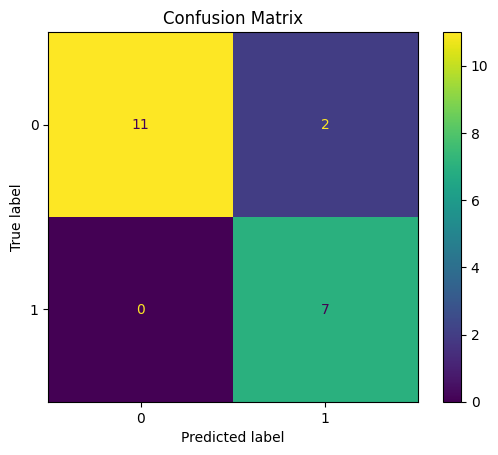

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1)  
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predictions
y_pred = knModel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('Confusion Matrix')
plt.show()



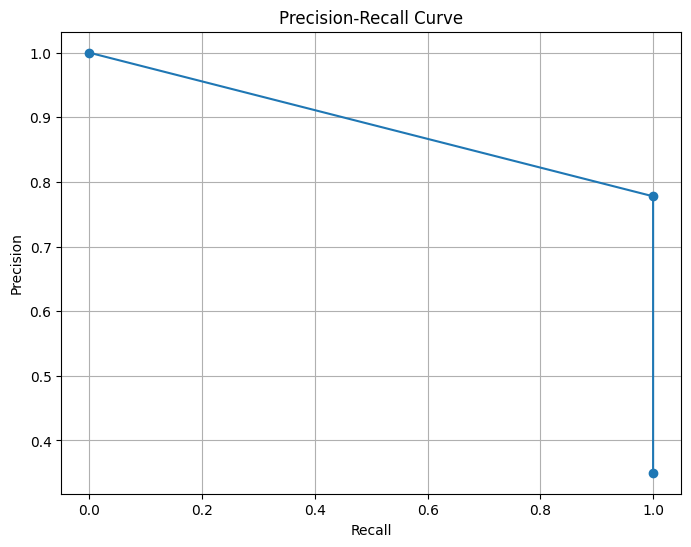

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1) 
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predicted probabilities
y_scores = knModel.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

# graph that shows how well it performs by plotting precision vs recall. Summarizes overall performance of the model
# Recall = True Positives/ True Positives + False Negatives
 



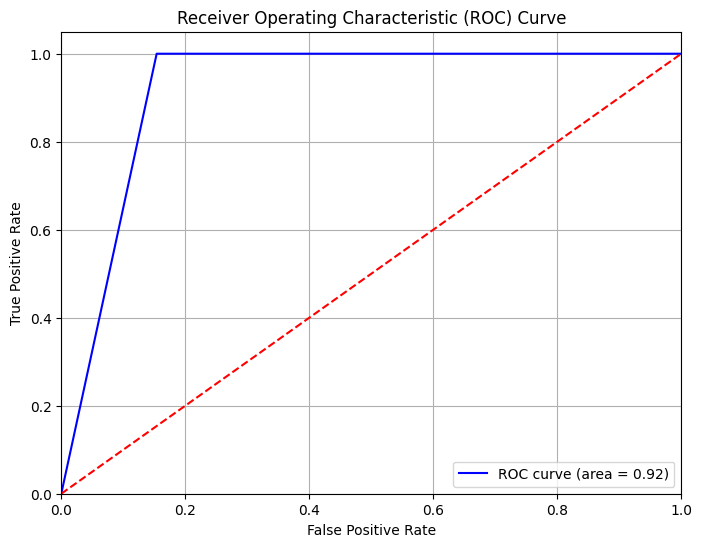

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1)  
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predicted probabilities
y_scores = knModel.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#shows how well the model performs over various different thresholds. (0.92 ROC curve is great)